# UDACITY CAPSTONE PROJECT:   STOCK PRICE PREDICTION

   This project focuses on building a stock price predictor that takes daily trading data over a certain date range (time-series data) as input, and outputs projected estimates for given query dates. <br>
   In this project, I am making use of stock data over last five years(1st Jan 2014 to 1st  Jan 2019) of five trading companies that is, Google(GOOG), Apple(APPL), Amazon(AMZN), Facebook(FB) and Netflix(NFLX). Data is downloaded in csv from [Yahoo Finance](https://in.finance.yahoo.com/). <br>
   Note that the inputs will contain multiple metrics, such as opening price (Open), highest price the stock traded at (High), how many stocks were traded (Volume) and closing price adjusted for stock splits and dividends (Adjusted Close), though we only need to predict the Adjusted Close price so this is the most prominent concern for us. <br>

In [1]:
""" Importing modules necessary to run."""
# Module for Data Exploration
from data_exploration import *
# Module for Data Preprocessing
from data_preprocessing import *
# Module for Benchmark model
from model.benchmark_model import *
# Module for Model Evaluation
from model.evaluation_helper import *
# Module for LSTM model (simple and improved one)
from model.lstm_model import *

Using TensorFlow backend.


## Reading stock data

In [2]:
# Load stock data from .csv file
stocks = load_data('./data/GOOG.csv')

stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,552.526367,556.878052,549.555664,556.734009,556.734009,2733400
1,2014-01-02,554.125916,555.263550,550.549194,552.963501,552.963501,3666400
2,2014-01-03,553.897461,554.856201,548.894958,548.929749,548.929749,3355000
3,2014-01-06,552.908875,555.814941,549.645081,555.049927,555.049927,3561600
4,2014-01-07,558.865112,566.162659,556.957520,565.750366,565.750366,5138400


In [3]:
# Transform stock data to separate out feature set and label set
stocks = transform_data(stocks)

stocks.head()

,Date,Relative_Date,Volume,Open,High,Low,Close,Adj Close
0,2013-12-31,0,2733400,552.526367,556.878052,549.555664,556.734009,556.734009
1,2014-01-02,1,3666400,554.125916,555.263550,550.549194,552.963501,552.963501
2,2014-01-03,2,3355000,553.897461,554.856201,548.894958,548.929749,548.929749
3,2014-01-06,3,3561600,552.908875,555.814941,549.645081,555.049927,555.049927
4,2014-01-07,4,5138400,558.865112,566.162659,556.957520,565.750366,565.750366


## Data Exploration

In [4]:
# Displays statistics over data insights.
display_statistics(stocks)

Data Statistics...

Open --->
Min:  491.94281 	 Mean : 787.285428951 	 Std:  215.252833686 	 Max:  1271.0
High --->
Min:  493.261566 	 Mean : 793.849246497 	 Std:  217.640945524 	 Max:  1273.890015
Low --->
Min:  484.891632 	 Mean : 780.097597724 	 Std:  213.205546288 	 Max:  1249.02002
Close --->
Min:  489.854309 	 Mean : 787.114218611 	 Std:  215.435792582 	 Max:  1268.329956
Volume --->
Min:  7900 	 Mean : 1923273.1533 	 Std:  1120658.78407 	 Max:  11204900


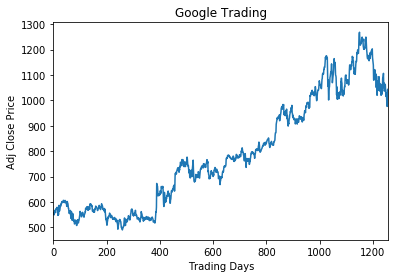

In [5]:
# Visualize `Adj Close` which is our primary price target for stock data.
visualize(stocks, title='Google Trading', column='Adj Close',x_label='Trading Days',y_label='Adj Close Price')

## Data Preprocessing for Benchmark model

In [6]:
""" Preprocessing data."""

# Normalizing features('Relative_date' and 'Volume') and label('Adj Close') 
X, y = get_normalized_feature_label(stocks, features_col=[0,1], labels_col=[6])

# Splitting dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Min max scaling of dataset to range of (0.0, 1.0)
X_train, y_train = min_max_scaling(X_train, y_train)
X_test, y_test = min_max_scaling(X_test, y_test)

# Displays size for Training and Testing dataset
print("No of training feature points: {}".format(X_train.shape))
print("No of training label points: {}".format(y_train.shape))
print("No of testing feature points: {}".format(X_test.shape))
print("No of testing label points: {}".format(y_test.shape))


No of training feature points: (1008, 2)
No of training label points: (1008, 1)
No of testing feature points: (251, 2)
No of testing label points: (251, 1)


## Benchmark model

In [7]:
# Building benchmark model and displaying model summary
model_benchmark = build_benchmark_model(X_train, y_train)

Model coefficient: [[ 0.86965828  0.1940259 ]]
Model intercept: [-0.10091482]


r2_score: 0.8677523182737249
mean_squared_error: 0.009114244694205126
root_mean_squared_error: 0.09546855343098651


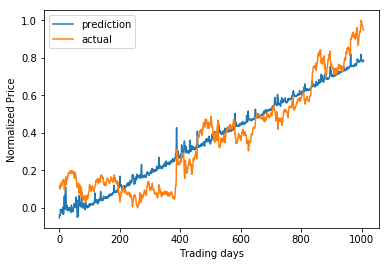

In [8]:
# Training prediction plot
predict_and_plot(model_benchmark, X_train, y_train)

r2_score: -1.415025928569825
mean_squared_error: 0.12773974706658645
root_mean_squared_error: 0.3574069768017777


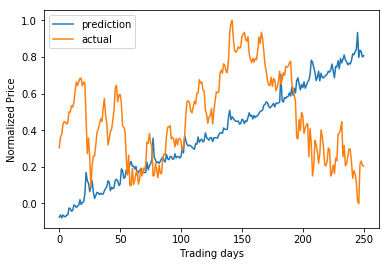

In [9]:
# Testing prediction plot
predict_and_plot(model_benchmark, X_test, y_test)

## Data Preprocessing for LSTM model

In [10]:
# Normalizing features('Volume','Open','High','Low') and label('Adj Close') 
X, y = get_normalized_feature_label(stocks , features_col=[1,2,3,4], labels_col=[6])

# Splitting into training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

X_train, y_train = min_max_scaling(X_train, y_train)
X_val, y_val = min_max_scaling(X_val, y_val)
X_test, y_test = min_max_scaling(X_test, y_test)

# Reshape feature set in order to feed into LSTM network.
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## Simple LSTM model

In [11]:
# Build model and display summary
model_simple, history = build_simple_model(X_train, y_train, X_val, y_val)

Train on 908 samples, validate on 100 samples
Epoch 1/20
908/908 [==============================] - 0s 401us/step - loss: 0.2355 - mean_squared_error: 0.0784 - val_loss: 0.2525 - val_mean_squared_error: 0.0803
Epoch 2/20
908/908 [==============================] - 0s 144us/step - loss: 0.2228 - mean_squared_error: 0.0703 - val_loss: 0.2374 - val_mean_squared_error: 0.0710
Epoch 3/20
908/908 [==============================] - 0s 145us/step - loss: 0.2065 - mean_squared_error: 0.0606 - val_loss: 0.2172 - val_mean_squared_error: 0.0596
Epoch 4/20
908/908 [==============================] - 0s 139us/step - loss: 0.1849 - mean_squared_error: 0.0489 - val_loss: 0.1898 - val_mean_squared_error: 0.0459
Epoch 5/20
908/908 [==============================] - 0s 146us/step - loss: 0.1571 - mean_squared_error: 0.0360 - val_loss: 0.1544 - val_mean_squared_error: 0.0313
Epoch 6/20
908/908 [==============================] - 0s 153us/step - loss: 0.1234 - mean_squared_error: 0.0231 - val_loss: 0.1150 - v

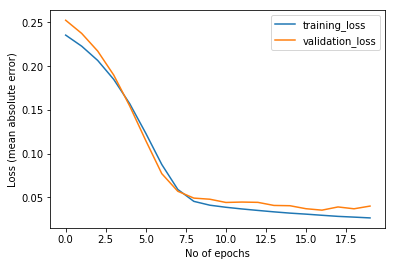

In [12]:
# Plot improve over loss over no of epochs
plot_loss(history)

r2_score: 0.9845758852777294
mean_squared_error: 0.0010529522521670882
root_mean_squared_error: 0.03244922575604984


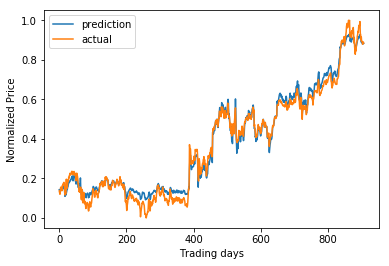

In [13]:
# Training prediction plot
predict_and_plot(model_simple, X_train, y_train)

r2_score: 0.973741247534273
mean_squared_error: 0.0023824162990268055
root_mean_squared_error: 0.048810002038791246


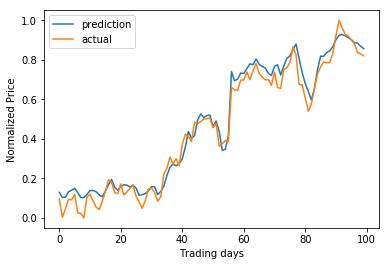

In [14]:
# Validation prediction plot
predict_and_plot(model_simple, X_val, y_val)

r2_score: 0.9508455680487824
mean_squared_error: 0.0025999616113308844
root_mean_squared_error: 0.05098981870266734


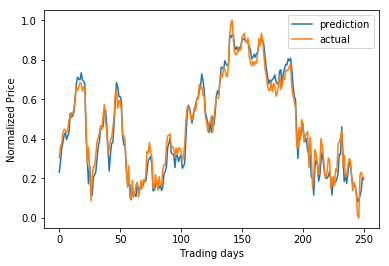

In [15]:
# Testing prediction plot
predict_and_plot(model_simple, X_test, y_test)

## Improved LSTM model

In [16]:
# Improved LSTM model
model_improved, history = build_improved_model(X_train, y_train, X_val, y_val)

Train on 908 samples, validate on 100 samples
Epoch 1/20
908/908 [==============================] - 2s 2ms/step - loss: 0.2321 - mean_squared_error: 0.0754 - val_loss: 0.2317 - val_mean_squared_error: 0.0671
Epoch 2/20
908/908 [==============================] - 2s 2ms/step - loss: 0.1399 - mean_squared_error: 0.0313 - val_loss: 0.0584 - val_mean_squared_error: 0.0063
Epoch 3/20
908/908 [==============================] - 1s 2ms/step - loss: 0.0408 - mean_squared_error: 0.0028 - val_loss: 0.0425 - val_mean_squared_error: 0.0031
Epoch 4/20
908/908 [==============================] - 1s 2ms/step - loss: 0.0327 - mean_squared_error: 0.0017 - val_loss: 0.0352 - val_mean_squared_error: 0.0020
Epoch 5/20
908/908 [==============================] - 1s 2ms/step - loss: 0.0284 - mean_squared_error: 0.0013 - val_loss: 0.0347 - val_mean_squared_error: 0.0018
Epoch 6/20
908/908 [==============================] - 1s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0010 - val_loss: 0.0308 - val_mean_squa

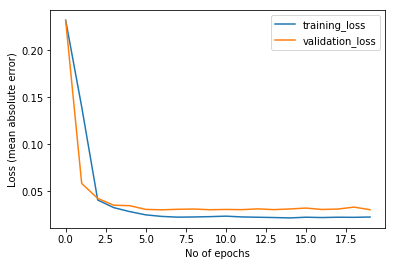

In [17]:
# Plot improve over loss over no of epochs
plot_loss(history)

r2_score: 0.9879459186429959
mean_squared_error: 0.0008228914489553583
root_mean_squared_error: 0.028686084587398093


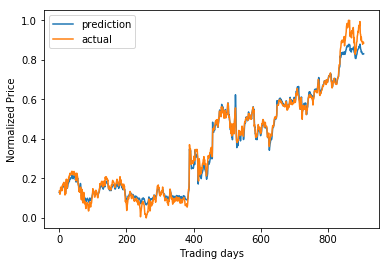

In [18]:
# Training prediction plot
predict_and_plot(model_improved, X_train, y_train)

r2_score: 0.9819615408159436
mean_squared_error: 0.001636601709297389
root_mean_squared_error: 0.04045493430098965


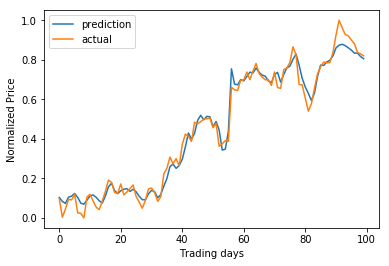

In [19]:
# Validation prediction plot
predict_and_plot(model_improved, X_val, y_val)

r2_score: 0.9538591171436863
mean_squared_error: 0.002440563737129292
root_mean_squared_error: 0.04940206207365531


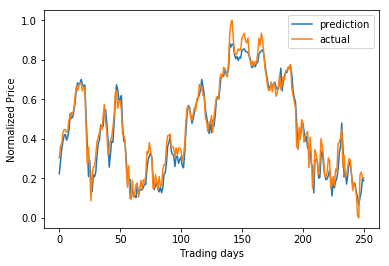

In [20]:
# Testing prediction plot
predict_and_plot(model_improved, X_test, y_test)

## Robustness Check

AMZN Trading
r2_score: 0.9831487380471252
mean_squared_error: 0.001246867053278604
root_mean_squared_error: 0.03531100470502934


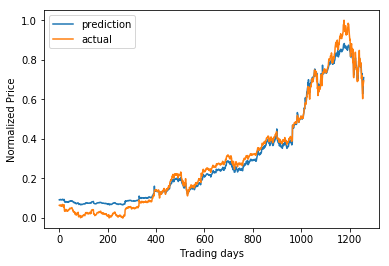

FB Trading
r2_score: 0.9914342767987853
mean_squared_error: 0.0005442728422325693
root_mean_squared_error: 0.023329655853281877


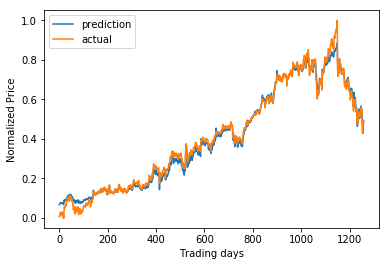

NFLX Trading
r2_score: 0.984126291770032
mean_squared_error: 0.0010567463119250291
root_mean_squared_error: 0.03250763467133573


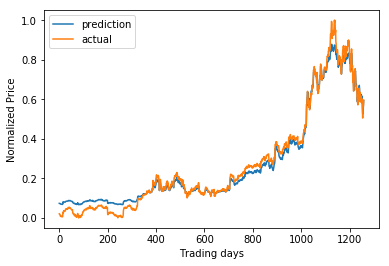

AAPL Trading
r2_score: 0.9765285714395611
mean_squared_error: 0.001259258739464848
root_mean_squared_error: 0.035486035837563594


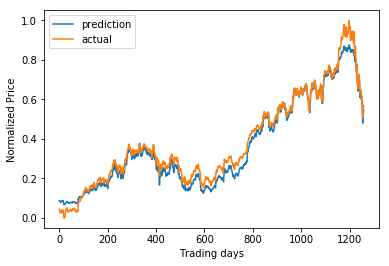

In [21]:
# Last five years trading data 
trading_data = ['AMZN','FB','NFLX','AAPL']

for trade_company in trading_data:
    # Load stock data
    stocks = load_data('./data/{}.csv'.format(trade_company))
    # Transform stock data
    stocks = transform_data(stocks)
    # Data Preprocessing
    X, y = get_normalized_feature_label(stocks, features_col=[1,2,3,4], labels_col=[6])
    # Reshaping to consume into LSTM network
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    print("{} Trading".format(trade_company))
    # Perform perdiction on features using improved model
    predict_and_plot(model_improved, X, y)
